In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

%matplotlib inline

In [34]:
bureau = pd.read_csv('../input/bureau.csv')
bb = pd.read_csv('../input/bureau_balance.csv')

<font size=3> STATUS: 

Status of Credit Bureau loan during the month (active, closed, DPD0-30, ? )

C means closed

X means status unknown,

0 means no DPD, 

1 means maximal did during month between 1-30, 

2 means DPD 31-60,

? 5 means DPD 120+ or sold or written off

In [35]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [36]:
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

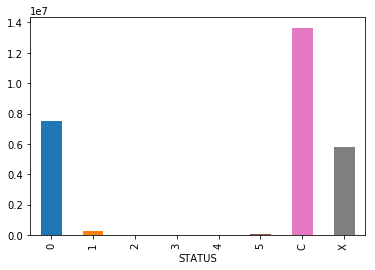

In [37]:
bb.groupby('STATUS').size().plot(kind='bar')

<font size=3> merely a tiny part of the bureau balance records are overdue

<font size=3> take a glimpse on some records

In [38]:
bb[bb['SK_ID_BUREAU'] == 5001709]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079753,5001709,0,C
26079754,5001709,-1,C
26079755,5001709,-2,C
26079756,5001709,-3,C
26079757,5001709,-4,C
26079758,5001709,-5,C
26079759,5001709,-6,C
26079760,5001709,-7,C
26079761,5001709,-8,C
26079762,5001709,-9,C


In [39]:
bb[bb['SK_ID_BUREAU'] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


<font size=3> apprently this credit went go through 3 types of status.

In [40]:
def one_hot_encoding(df, nan_as_category):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [41]:
bb_one_year = bb[bb['MONTHS_BALANCE'] >= -12]
bb_half_year = bb[bb['MONTHS_BALANCE'] >= -6]

def see_change(x):
    return (x.nunique() > 1).astype('int')

bb_agg = bb.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).rename(columns={'STATUS': 'STATUS_CHANGE'})
bb_agg_one_year = bb_one_year.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).rename(columns={'STATUS': 'ONE_YEAR_STATUS_CHANGE'})
bb_agg_half_year = bb_half_year.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).rename(columns={'STATUS': 'HALF_YEAR_STATUS_CHANGE'})

In [42]:
# get the latest status for a certain bureau id
def find_lateset_status(df):
    # note that month balance is negative
    return df[df['MONTHS_BALANCE'] == df['MONTHS_BALANCE'].max()]['STATUS'].values[0]

latest_status = {}
for sk_id, sub_df in bb.groupby('SK_ID_BUREAU'):
    latest_status[sk_id] = find_lateset_status(sub_df)
bb_agg['LATEST_STATUS'] = pd.Series(latest_status)

<font size=4> see the distribution on LATEST_STATUS

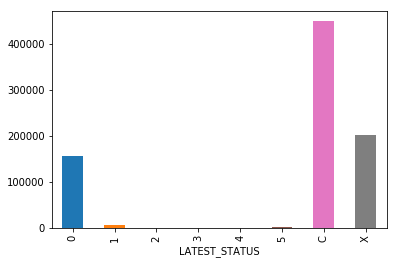

In [43]:
bb_agg.groupby('LATEST_STATUS').size().plot(kind='bar')

In [44]:
bb_agg, _ = one_hot_encoding(bb_agg, nan_as_category=True)

In [45]:
bb, bb_cat = one_hot_encoding(bb, nan_as_category=True)
bb_one_year = bb[bb['MONTHS_BALANCE'] >= -12]
bb_half_year = bb[bb['MONTHS_BALANCE'] >= -6]

bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

status_aggregations = {}
for col in bb_cat:
    status_aggregations[col] = ['mean', 'sum']

bb_agg_auto = bb.groupby('SK_ID_BUREAU').agg({**bb_aggregations, **status_aggregations})
bb_agg_auto.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg_auto.columns.tolist()])
bb_agg = bb_agg.join(bb_agg_auto, on='SK_ID_BUREAU', how='left')

bb_agg_one_year_auto = bb_one_year.groupby('SK_ID_BUREAU').agg(status_aggregations)
bb_agg_one_year_auto.columns = pd.Index(['ONE_YEAR_' + e[0] + "_" + e[1].upper() for e in bb_agg_one_year_auto.columns.tolist()])
bb_agg_one_year = bb_agg_one_year.join(bb_agg_one_year_auto, on='SK_ID_BUREAU', how='left')


bb_agg_half_year_auto = bb_half_year.groupby('SK_ID_BUREAU').agg(status_aggregations)
bb_agg_half_year_auto.columns = pd.Index(['HALF_YEAR_' + e[0] + "_" + e[1].upper() for e in bb_agg_half_year_auto.columns.tolist()])
bb_agg_half_year = bb_agg_half_year.join(bb_agg_half_year_auto, on='SK_ID_BUREAU', how='left')

del bb_agg_auto, bb_agg_one_year_auto, bb_agg_half_year_auto
gc.collect()

105

In [46]:
# merge all back
bb_agg = bb_agg.join(bb_agg_one_year, on='SK_ID_BUREAU', how='left')
bb_agg = bb_agg.join(bb_agg_half_year, on='SK_ID_BUREAU', how='left')
del bb_agg_one_year, bb_agg_half_year, bb
gc.collect()

50

In [79]:
for col in [col for col in bb_agg.columns if 'STATUS_CHANGE' in col]:
    bb_agg[col] = bb_agg[col].astype('float')

In [47]:
for col in bb_agg.columns:
    print(col)

STATUS_CHANGE
LATEST_STATUS_0
LATEST_STATUS_1
LATEST_STATUS_2
LATEST_STATUS_3
LATEST_STATUS_4
LATEST_STATUS_5
LATEST_STATUS_C
LATEST_STATUS_X
LATEST_STATUS_nan
MONTHS_BALANCE_MIN
MONTHS_BALANCE_MAX
MONTHS_BALANCE_SIZE
STATUS_0_MEAN
STATUS_0_SUM
STATUS_1_MEAN
STATUS_1_SUM
STATUS_2_MEAN
STATUS_2_SUM
STATUS_3_MEAN
STATUS_3_SUM
STATUS_4_MEAN
STATUS_4_SUM
STATUS_5_MEAN
STATUS_5_SUM
STATUS_C_MEAN
STATUS_C_SUM
STATUS_X_MEAN
STATUS_X_SUM
STATUS_nan_MEAN
STATUS_nan_SUM
ONE_YEAR_STATUS_CHANGE
ONE_YEAR_STATUS_0_MEAN
ONE_YEAR_STATUS_0_SUM
ONE_YEAR_STATUS_1_MEAN
ONE_YEAR_STATUS_1_SUM
ONE_YEAR_STATUS_2_MEAN
ONE_YEAR_STATUS_2_SUM
ONE_YEAR_STATUS_3_MEAN
ONE_YEAR_STATUS_3_SUM
ONE_YEAR_STATUS_4_MEAN
ONE_YEAR_STATUS_4_SUM
ONE_YEAR_STATUS_5_MEAN
ONE_YEAR_STATUS_5_SUM
ONE_YEAR_STATUS_C_MEAN
ONE_YEAR_STATUS_C_SUM
ONE_YEAR_STATUS_X_MEAN
ONE_YEAR_STATUS_X_SUM
ONE_YEAR_STATUS_nan_MEAN
ONE_YEAR_STATUS_nan_SUM
HALF_YEAR_STATUS_CHANGE
HALF_YEAR_STATUS_0_MEAN
HALF_YEAR_STATUS_0_SUM
HALF_YEAR_STATUS_1_MEAN
HALF_YEA

In [48]:
bb_cat = [col for col in bb_agg.columns if 'STATUS_CHANGE' not in col and 'MONTHS_BALANCE' not in col]

<font size=5> Process Bureau

<font size=3>
SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed

CREDIT_ACTIVE, Status of the Credit Bureau (CB) **reported** credits,

CREDIT_CURRENCY, Recoded currency of the Credit Bureau credit,recoded

DAYS_CREDIT, How many days before current application did client apply for Credit Bureau credit,time only relative to the application

CREDIT_DAY_OVERDUE, Number of days past due on CB credit at the time of application for related loan in our sample,

DAYS_CREDIT_ENDDATE, Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application - Positive for the loan still not paid totally

DAYS_ENDDATE_FACT, Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application

AMT_CREDIT_MAX_OVERDUE, Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),

CNT_CREDIT_PROLONG, How many times was the Credit Bureau credit prolonged,

AMT_CREDIT_SUM, Current credit amount for the Credit Bureau credit,

AMT_CREDIT_SUM_DEBT, Current debt on Credit Bureau credit,

AMT_CREDIT_SUM_LIMIT, Current credit limit of credit card reported in Credit Bureau,

AMT_CREDIT_SUM_OVERDUE, Current amount overdue on Credit Bureau credit,

CREDIT_TYPE, Type of Credit Bureau credit (Car, cash,...),

DAYS_CREDIT_UPDATE, How many days before loan application did last information about the Credit Bureau credit come,time only relative to the application

AMT_ANNUITY, Annuity of the Credit Bureau credit,

In [17]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [18]:
bureau.isnull().sum() / len(bureau)

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

<font size=3> see the distribution on some cols

In [19]:
cate_cols = [col for col in bureau.columns if bureau[col].dtype == 'object']

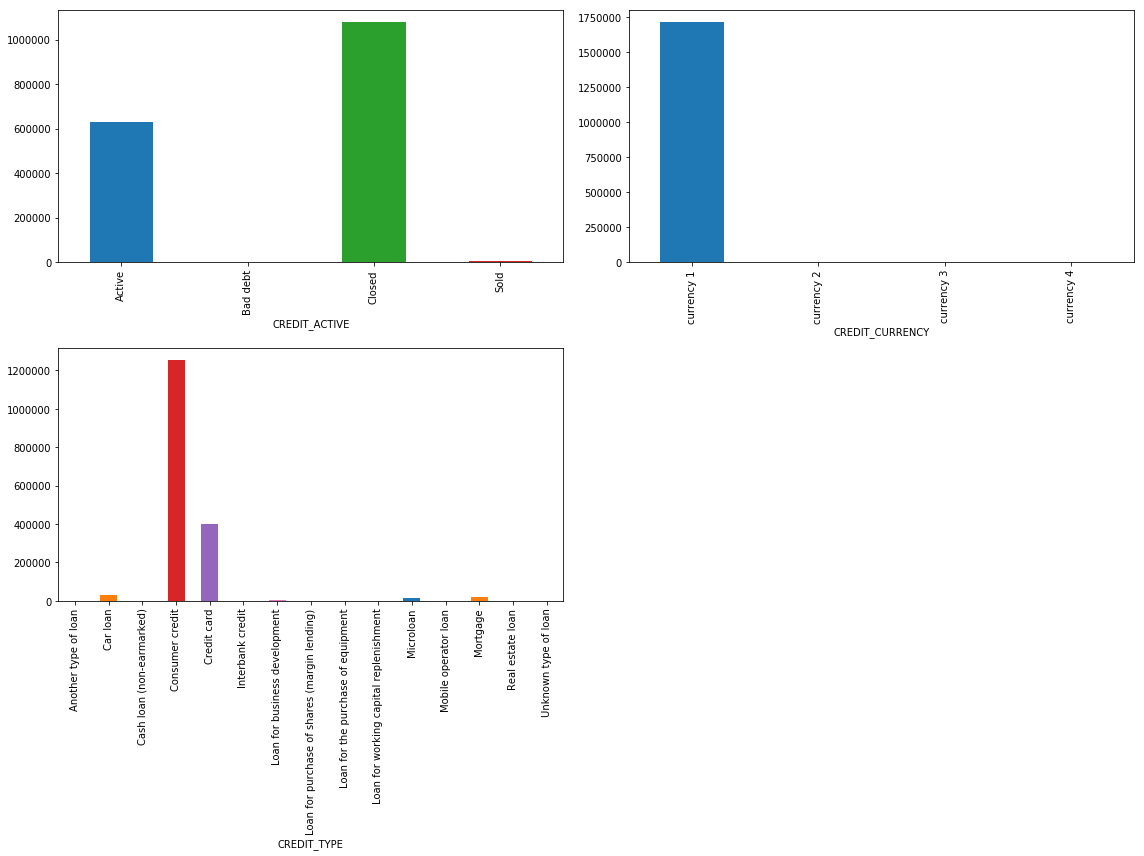

In [20]:
def draw_cate_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(16, 12))
    for col in cols:
        plt.subplot(n_row, 2, i)
        bureau.groupby(col).size().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()

draw_cate_dist(cate_cols)

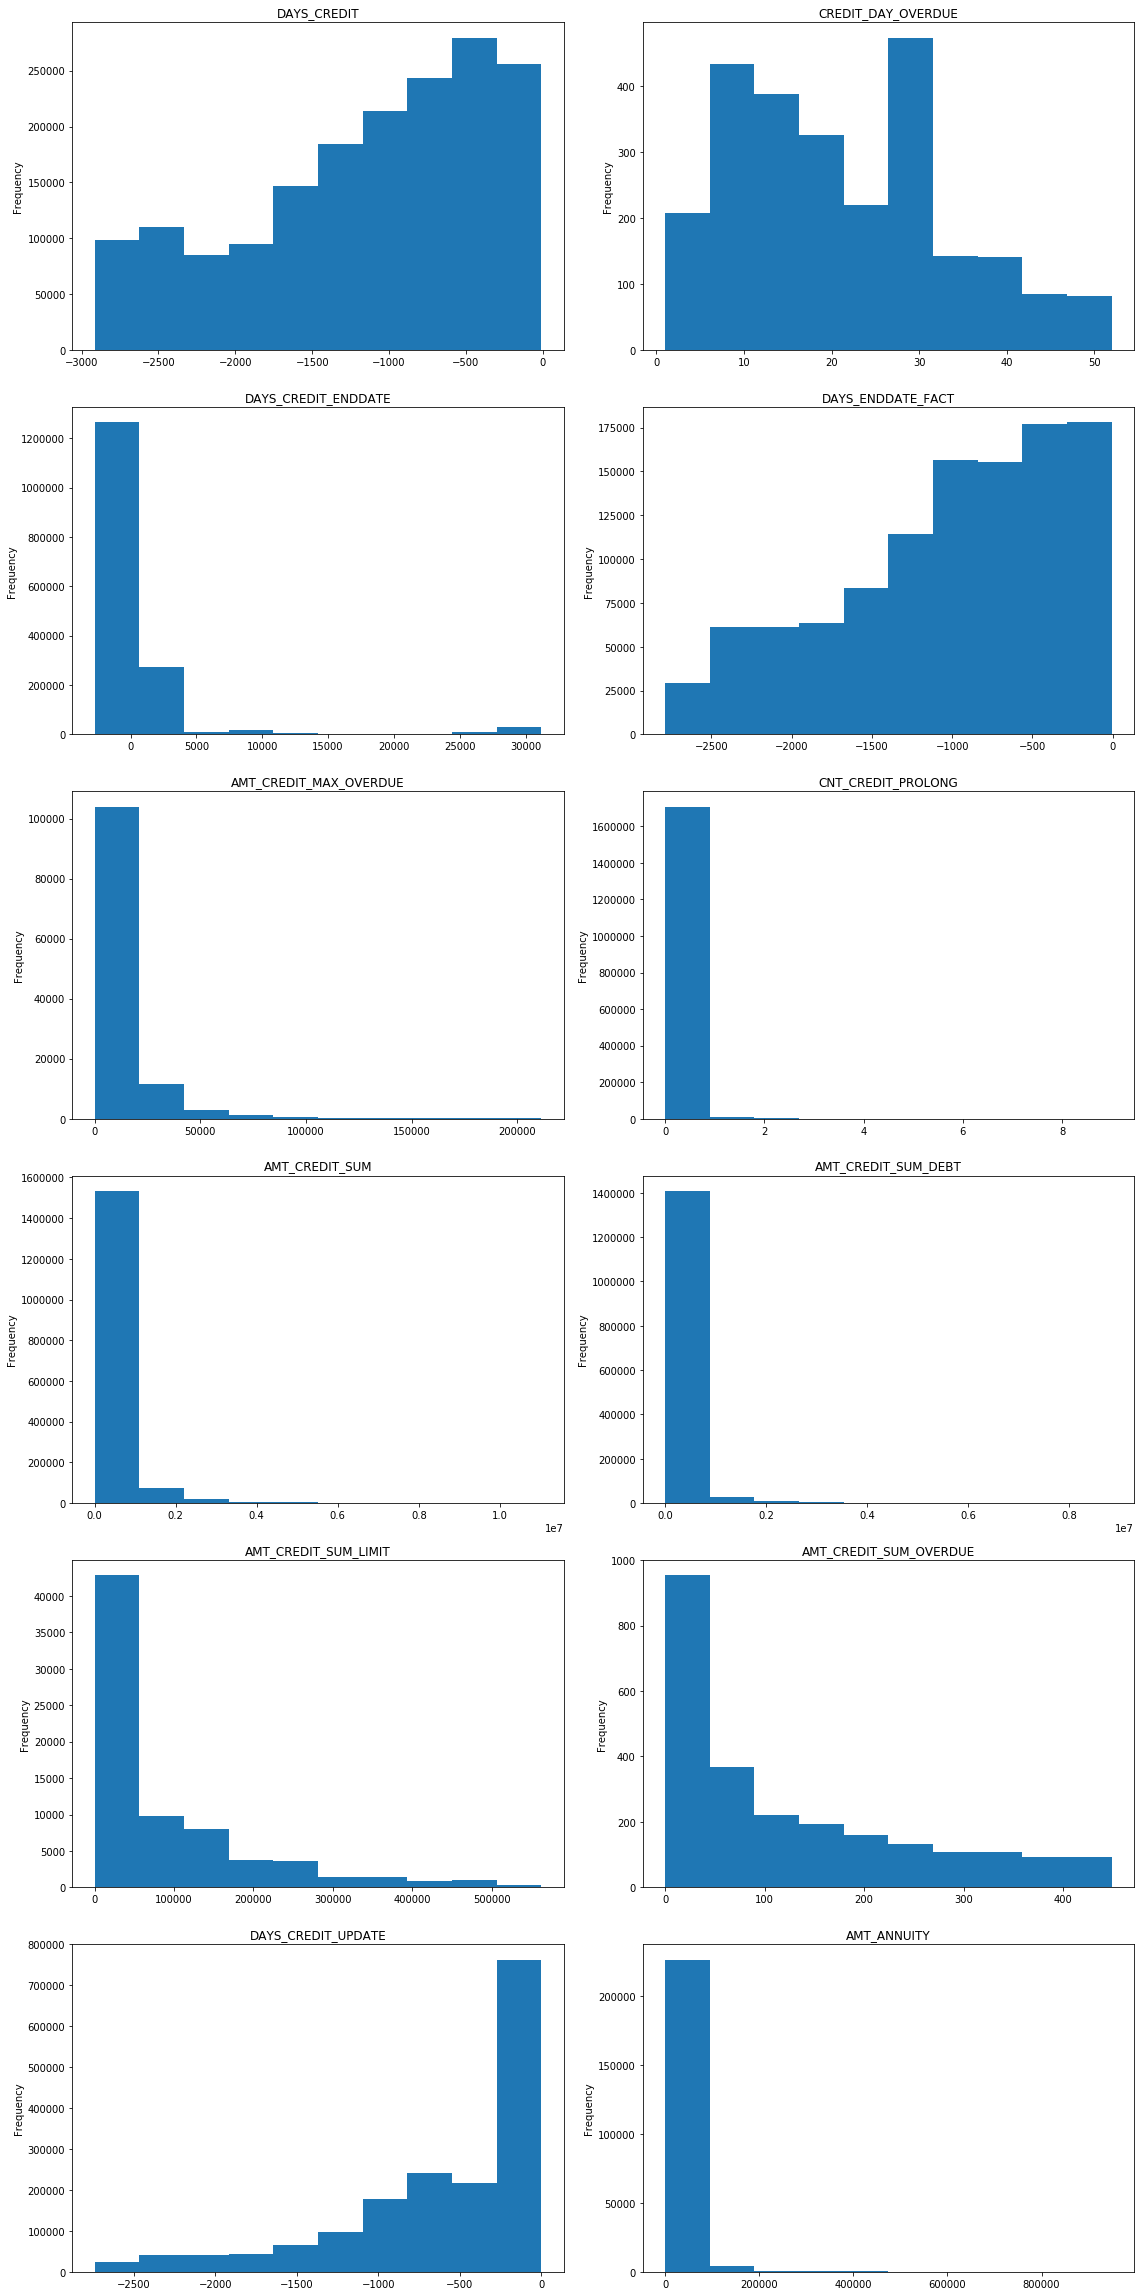

In [21]:
numeric_cols = [col for col in bureau.columns if col not in cate_cols and 'ID' not in col]
def draw_numeric_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(16, 32))
    for col in cols:
        plt.subplot(n_row, 2, i)
        if bureau[col].nunique() > 10:
            up_bnd = bureau[col].quantile(.999)
            low_bnd = bureau[col].quantile(.001)
            bureau[(bureau[col] > low_bnd) & (bureau[col] < up_bnd)][col].plot(kind='hist')
        else:
            bureau[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

draw_numeric_dist(numeric_cols)

In [83]:
bureau = bureau.join(bb_agg, on='SK_ID_BUREAU', how='left')
bureau.drop(columns='SK_ID_BUREAU', inplace=True)

In [88]:
for col in bureau.columns:
    print(col)

SK_ID_CURR
CREDIT_ACTIVE
CREDIT_CURRENCY
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY
STATUS_CHANGE
LATEST_STATUS_0
LATEST_STATUS_1
LATEST_STATUS_2
LATEST_STATUS_3
LATEST_STATUS_4
LATEST_STATUS_5
LATEST_STATUS_C
LATEST_STATUS_X
LATEST_STATUS_nan
MONTHS_BALANCE_MIN
MONTHS_BALANCE_MAX
MONTHS_BALANCE_SIZE
STATUS_0_MEAN
STATUS_0_SUM
STATUS_1_MEAN
STATUS_1_SUM
STATUS_2_MEAN
STATUS_2_SUM
STATUS_3_MEAN
STATUS_3_SUM
STATUS_4_MEAN
STATUS_4_SUM
STATUS_5_MEAN
STATUS_5_SUM
STATUS_C_MEAN
STATUS_C_SUM
STATUS_X_MEAN
STATUS_X_SUM
STATUS_nan_MEAN
STATUS_nan_SUM
ONE_YEAR_STATUS_CHANGE
ONE_YEAR_STATUS_0_MEAN
ONE_YEAR_STATUS_0_SUM
ONE_YEAR_STATUS_1_MEAN
ONE_YEAR_STATUS_1_SUM
ONE_YEAR_STATUS_2_MEAN
ONE_YEAR_STATUS_2_SUM
ONE_YEAR_STATUS_3_MEAN
ONE_YEAR_STATUS_3_SUM
ONE_YEAR_STATUS_4_MEAN
ONE_YEAR_STATUS_4_SUM
ONE_YEAR_STAT

In [89]:
# procesing on DAYS related features
bureau['DAYS_CREDIT_TO_UPDATE_RATIO'] = (bureau['DAYS_CREDIT'] - 1) / (bureau['DAYS_CREDIT_UPDATE'] - 1)
bureau['DAYS_FACT_LT_ENDDATE'] = bureau['DAYS_ENDDATE_FACT'] < bureau['DAYS_CREDIT_ENDDATE']
bureau['DAYS_FACT_TO_ENDDATE_RATIO'] = bureau['DAYS_ENDDATE_FACT'] / bureau['DAYS_CREDIT_ENDDATE']
# this means a client applied for a loan in homeCredit before his original creditBureau loan ended
bureau['DAYS_ENDDATE_TO_DAYS_CREDIT_RATIO'] = bureau['DAYS_CREDIT_ENDDATE'] / bureau['DAYS_CREDIT']
bureau['DAYS_ENDDATE_GT_CREDIT'] = bureau['DAYS_CREDIT_ENDDATE'] > bureau['DAYS_CREDIT']
bureau['DAYS_OVERDUE_TO_CREDIT_RATIO'] = -1 * bureau['CREDIT_DAY_OVERDUE'] / bureau['DAYS_CREDIT']

bureau['IS_END_IN_FUTURE'] = (bureau['DAYS_CREDIT_ENDDATE'] > 0).astype('float')
bureau['IS_OLD_UPDATE'] = (bureau['DAYS_CREDIT_UPDATE'] < -365).astype('float')

<font size=4> the amt featurs should satisfy this equation:

AMT_CREDIT_SUM_LIMIT + AMT_CREDIT_SUM_DEBT = AMT_CREDIT_SUM

so we do some correction on it

In [90]:
def is_null_or_zero(val):
    return pd.isnull(val) or val == 0

def correct_credit_debt(df):
    sum_, limit, debt = df['AMT_CREDIT_SUM'], df['AMT_CREDIT_SUM_LIMIT'], df['AMT_CREDIT_SUM_DEBT']
    if is_null_or_zero(debt) and not is_null_or_zero(limit):
        debt = sum_ - limit
    return debt    
def correct_credit_limit(df):
    sum_, limit, debt = df['AMT_CREDIT_SUM'], df['AMT_CREDIT_SUM_LIMIT'], df['AMT_CREDIT_SUM_DEBT']
    if is_null_or_zero(limit) and not is_null_or_zero(debt):
        limit = sum_ - debt
    return limit

bureau['AMT_CREDIT_SUM_DEBT'] = bureau.apply(correct_credit_debt, axis=1)
bureau['AMT_CREDIT_SUM_LIMIT'] = bureau.apply(correct_credit_limit, axis=1)

In [91]:
# processing on AMT features
bureau['AMT_OVERDUE_TO_CREDIT_RATIO'] = bureau['AMT_CREDIT_SUM_OVERDUE'] / bureau['AMT_CREDIT_SUM']
bureau['AMT_OVERDUE_TO_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_OVERDUE'] / bureau['AMT_CREDIT_SUM_DEBT']
bureau['AMT_DEBT_TO_CREDIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
bureau['AMT_LIMIT_TO_CREDIT_RATIO'] = bureau['AMT_CREDIT_SUM_LIMIT'] / bureau['AMT_CREDIT_SUM']
bureau['AMT_MAX_OVERDUE_TO_CREDIT_RATIO'] = bureau['AMT_CREDIT_MAX_OVERDUE'] / bureau['AMT_CREDIT_SUM']
bureau['AMT_ANNUITY_TO_CREDIT_RATIO'] = bureau['AMT_ANNUITY'] / bureau['AMT_CREDIT_SUM']

bureau['IS_DEBT_NEG'] = (bureau['AMT_CREDIT_SUM_DEBT'] < 0).astype('float')
bureau['IS_LIMIT_NEG'] = (bureau['AMT_CREDIT_SUM_DEBT'] < 0).astype('float')

In [92]:
# CREDIT TYPE DIVERSITY
bureau_agg = bureau.groupby('SK_ID_CURR')[['CREDIT_TYPE']]\
                .nunique().rename(columns={'CREDIT_TYPE': 'BURO_CREDIT_TYPE_CNT'})

bureau_agg['BURO_TOTAL_CREDIT_CNT'] = bureau.groupby('SK_ID_CURR')['CREDIT_TYPE'].size()
bureau_agg['BURO_CREDIT_TYPE_DIVERSITY'] = bureau_agg['BURO_TOTAL_CREDIT_CNT'] / bureau_agg['BURO_CREDIT_TYPE_CNT']

# LOAN FREQUENCY
temp = bureau[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')
temp = temp.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending=False)).reset_index(drop=True)

temp['DAYS_CREDIT'] = -1 * temp['DAYS_CREDIT']
bureau_agg['DAYS_DIFF'] = temp.groupby('SK_ID_CURR')['DAYS_CREDIT'].diff()

In [93]:
for col in bureau.columns:
    print(col)

SK_ID_CURR
CREDIT_ACTIVE
CREDIT_CURRENCY
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY
STATUS_CHANGE
LATEST_STATUS_0
LATEST_STATUS_1
LATEST_STATUS_2
LATEST_STATUS_3
LATEST_STATUS_4
LATEST_STATUS_5
LATEST_STATUS_C
LATEST_STATUS_X
LATEST_STATUS_nan
MONTHS_BALANCE_MIN
MONTHS_BALANCE_MAX
MONTHS_BALANCE_SIZE
STATUS_0_MEAN
STATUS_0_SUM
STATUS_1_MEAN
STATUS_1_SUM
STATUS_2_MEAN
STATUS_2_SUM
STATUS_3_MEAN
STATUS_3_SUM
STATUS_4_MEAN
STATUS_4_SUM
STATUS_5_MEAN
STATUS_5_SUM
STATUS_C_MEAN
STATUS_C_SUM
STATUS_X_MEAN
STATUS_X_SUM
STATUS_nan_MEAN
STATUS_nan_SUM
ONE_YEAR_STATUS_CHANGE
ONE_YEAR_STATUS_0_MEAN
ONE_YEAR_STATUS_0_SUM
ONE_YEAR_STATUS_1_MEAN
ONE_YEAR_STATUS_1_SUM
ONE_YEAR_STATUS_2_MEAN
ONE_YEAR_STATUS_2_SUM
ONE_YEAR_STATUS_3_MEAN
ONE_YEAR_STATUS_3_SUM
ONE_YEAR_STATUS_4_MEAN
ONE_YEAR_STATUS_4_SUM
ONE_YEAR_STAT

In [94]:
bureau, bureau_cat = one_hot_encoding(bureau, nan_as_category=True)

# Bureau and bureau_balance numeric features
num_aggregations = {
    # Original Features
    'DAYS_CREDIT': ['mean', 'var', 'max', 'min'],
    'CREDIT_DAY_OVERDUE': ['mean', 'min', 'max'],
    'DAYS_CREDIT_ENDDATE': ['mean', 'min', 'max'],
    'DAYS_ENDDATE_FACT': ['mean', 'min', 'max'],
    'DAYS_CREDIT_UPDATE': ['mean', 'min', 'max'],
    
    'AMT_CREDIT_MAX_OVERDUE': ['sum', 'mean', 'min', 'max'],
    'AMT_CREDIT_SUM': ['sum', 'mean', 'min', 'max'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean', 'min', 'max'],
    'AMT_CREDIT_SUM_OVERDUE': ['sum', 'mean', 'min', 'max'],
    'AMT_CREDIT_SUM_LIMIT': ['sum', 'mean', 'min', 'max'],
    'AMT_ANNUITY': ['sum', 'mean', 'min', 'max'],
    'CNT_CREDIT_PROLONG': ['sum', 'mean', 'min', 'max'],

    # Manual Features on DAYS
    'DAYS_CREDIT_TO_UPDATE_RATIO': ['mean', 'min', 'max'],
    'DAYS_FACT_TO_ENDDATE_RATIO': ['mean', 'min', 'max'],
    'DAYS_FACT_LT_ENDDATE': ['mean', 'sum'],
    
    'DAYS_ENDDATE_TO_DAYS_CREDIT_RATIO': ['mean', 'min', 'max'],
    'DAYS_ENDDATE_GT_CREDIT': ['mean', 'sum'],
    'DAYS_OVERDUE_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'IS_END_IN_FUTURE': ['mean', 'sum'],
    'IS_OLD_UPDATE': ['mean', 'sum'],
    
    # Manual Features on AMT
    'AMT_OVERDUE_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'AMT_OVERDUE_TO_DEBT_RATIO': ['mean', 'min', 'max'],
    'AMT_DEBT_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'AMT_LIMIT_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'AMT_MAX_OVERDUE_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'AMT_ANNUITY_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    
    'IS_DEBT_NEG': ['mean', 'sum'],
    'IS_LIMIT_NEG': ['mean', 'sum'],
    
    # Numerical Features come from bureau_balance
    'STATUS_CHANGE': ['sum', 'mean'],
    'ONE_YEAR_STATUS_CHANGE': ['sum', 'mean'],
    'HALF_YEAR_STATUS_CHANGE': ['sum', 'mean'],
    
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
for cat in bureau_cat:
    cat_aggregations[cat] = ['mean']
for cat in bb_cat:
    cat_aggregations[cat] = ['mean', 'median']

bureau_agg_auto = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg_auto.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg_auto.columns.tolist()])
bureau_agg = bureau_agg.join(bureau_agg_auto, how='left', on='SK_ID_CURR')
del bureau_agg_auto
gc.collect()

# Bureau: Active credits
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

# Bureau: Closed credits
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg,

# Bureau: future credits - using only numerical aggregations
future = bureau[bureau['IS_END_IN_FUTURE'] == 1]
future_agg = future.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
future_agg.columns = pd.Index(['FUTURE_' + e[0] + "_" + e[1].upper() for e in future_agg.columns.tolist()])
bureau_agg = bureau_agg.join(future_agg, how='left', on='SK_ID_CURR')

In [96]:
for col in bureau_agg.columns:
    print(col)

BURO_CREDIT_TYPE_CNT
BURO_TOTAL_CREDIT_CNT
BURO_CREDIT_TYPE_DIVERSITY
DAYS_DIFF
BURO_DAYS_CREDIT_MEAN
BURO_DAYS_CREDIT_VAR
BURO_DAYS_CREDIT_MAX
BURO_DAYS_CREDIT_MIN
BURO_CREDIT_DAY_OVERDUE_MEAN
BURO_CREDIT_DAY_OVERDUE_MIN
BURO_CREDIT_DAY_OVERDUE_MAX
BURO_DAYS_CREDIT_ENDDATE_MEAN
BURO_DAYS_CREDIT_ENDDATE_MIN
BURO_DAYS_CREDIT_ENDDATE_MAX
BURO_DAYS_ENDDATE_FACT_MEAN
BURO_DAYS_ENDDATE_FACT_MIN
BURO_DAYS_ENDDATE_FACT_MAX
BURO_DAYS_CREDIT_UPDATE_MEAN
BURO_DAYS_CREDIT_UPDATE_MIN
BURO_DAYS_CREDIT_UPDATE_MAX
BURO_AMT_CREDIT_MAX_OVERDUE_SUM
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN
BURO_AMT_CREDIT_MAX_OVERDUE_MIN
BURO_AMT_CREDIT_MAX_OVERDUE_MAX
BURO_AMT_CREDIT_SUM_SUM
BURO_AMT_CREDIT_SUM_MEAN
BURO_AMT_CREDIT_SUM_MIN
BURO_AMT_CREDIT_SUM_MAX
BURO_AMT_CREDIT_SUM_DEBT_SUM
BURO_AMT_CREDIT_SUM_DEBT_MEAN
BURO_AMT_CREDIT_SUM_DEBT_MIN
BURO_AMT_CREDIT_SUM_DEBT_MAX
BURO_AMT_CREDIT_SUM_OVERDUE_SUM
BURO_AMT_CREDIT_SUM_OVERDUE_MEAN
BURO_AMT_CREDIT_SUM_OVERDUE_MIN
BURO_AMT_CREDIT_SUM_OVERDUE_MAX
BURO_AMT_CREDIT_SUM_LIM

ACTIVE_ONE_YEAR_STATUS_0_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_0_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_0_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_0_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_1_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_1_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_1_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_1_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_2_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_2_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_2_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_2_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_3_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_3_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_3_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_3_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_4_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_4_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_4_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_4_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_5_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_5_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_5_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_5_SUM_MEDIAN
ACTIVE_ONE_YEAR_STATUS_C_MEAN_MEAN
ACTIVE_ONE_YEAR_STATUS_C_MEAN_MEDIAN
ACTIVE_ONE_YEAR_STATUS_C_SUM_MEAN
ACTIVE_ONE_YEAR_STATUS_C_SUM_MEDIAN
ACTIVE

<font size=3> we now have 996 feats in burau_agg, feature selection seems necessary

<font size=3> First look at the missing ratio

In [103]:
with open('bureau_agg.pkl', 'wb') as f:
    import pickle
    pickle.dump(bureau, f)

In [101]:
(bureau_agg.isnull().sum() / len(bureau_agg)).sort_values(ascending=False)

ACTIVE_DAYS_FACT_TO_ENDDATE_RATIO_MEAN        0.993777
ACTIVE_DAYS_FACT_TO_ENDDATE_RATIO_MIN         0.993777
ACTIVE_DAYS_FACT_TO_ENDDATE_RATIO_MAX         0.993777
ACTIVE_DAYS_ENDDATE_FACT_MEAN                 0.993738
ACTIVE_DAYS_ENDDATE_FACT_MIN                  0.993738
ACTIVE_DAYS_ENDDATE_FACT_MAX                  0.993738
CLOSED_AMT_OVERDUE_TO_DEBT_RATIO_MAX          0.974223
CLOSED_AMT_OVERDUE_TO_DEBT_RATIO_MEAN         0.974223
CLOSED_AMT_OVERDUE_TO_DEBT_RATIO_MIN          0.974223
FUTURE_DAYS_FACT_TO_ENDDATE_RATIO_MEAN        0.745438
FUTURE_DAYS_ENDDATE_FACT_MEAN                 0.745438
FUTURE_DAYS_ENDDATE_FACT_MIN                  0.745438
FUTURE_DAYS_FACT_TO_ENDDATE_RATIO_MIN         0.745438
FUTURE_DAYS_FACT_TO_ENDDATE_RATIO_MAX         0.745438
FUTURE_DAYS_ENDDATE_FACT_MAX                  0.745438
FUTURE_AMT_ANNUITY_TO_CREDIT_RATIO_MIN        0.712512
FUTURE_AMT_ANNUITY_TO_CREDIT_RATIO_MEAN       0.712512
FUTURE_AMT_ANNUITY_TO_CREDIT_RATIO_MAX        0.712512
FUTURE_AMT